## -Mover archivos a hdfs
hdfs dfs -put idioma.txt(directorio local) /entrada (directorio hdfs)

## -Ejecutar map reduce hadoop streaming
yarn jar /hadoop/share/hadoop/tools/lib/hadoop-streaming-3-4-1.jar \
-input (directorio hdfs) /entrada \
-output (directorio hdfs) /salida_contador \
-mapper mapper.py \
-file (directorio local) mapper.py
-reducer reducer.py \
-file (directorio local) reducer.py

## -Ejecutarlo con librerías python no instaladas
yarn jar /hadoop/share/hadoop/tools/lib/hadoop-streaming-3-4-1.jar \
-input (directorio hdfs) /entrada \
-output (directorio hdfs) /salida_contador \
-mapper script.py \
-file script.py \
-file mapper.py \
-file entorno.zip \
-reducer reducer.py \
-file (directorio local) reducer.py

script.py
1.) Activar entorno descomprimiendo entorno.zip 
2.) Lanza mapper.py

## -Conocer el porcentaje de letras del total
Primer trabajo:

Mapper-> Guardaríamos las parejas clave valor y otra llamada total

Reduce-> Sumaríamos las apariciones

Segundo Trabajo:

Podríamos obtener el resultado de l porcentaje de cada letra sobre el total en el mapper o el reducer.


## Ejemplo de chatgpt de envío de librerías

In [ ]:
hadoop jar /path/to/hadoop-streaming.jar \
  -file mapper.py \
  -file reducer.py \
  -archives venv.zip \
  -mapper "./venv/bin/python3 venv/mapper.py" \
  -reducer "./venv/bin/python3 venv/reducer.py" \
  -input /ruta/input \
  -output /ruta/output


## Hive

Transformar la SQL en mapreduce sobre datos de Hadoop

Tablas internas
Tablas externas

📌 Tipos de tablas
Tipo	Descripción

Interna	Hive gestiona completamente los datos. Si borras la tabla, se borran los datos.

Externa	Hive solo lee los datos desde una ruta (HDFS, S3, etc.). Borrar la tabla no borra los datos.

## Ejemplo de matrículas

Mapper que con una librería de reconocimiento de imágenes generase pares de clave valor con la matrícula y un 1 o con el timestamp

En el reduces se podría hacer una media o contar afluencia en determinadas horas.

## Ejemplo de log de accesos de apache (guiño)

Mapper:
Split por espacios/guión y obtenemos la ip que es el primero campo.
Comprobar si existe el color rojo/verde/azul.

Reducer:
Sería interesante usar un conjunto que únicamente guarda una ocurrencia del valor.
Al cambiar de ip comprobamos la longitud del conjunto, si es mayor que 1 se descarta.

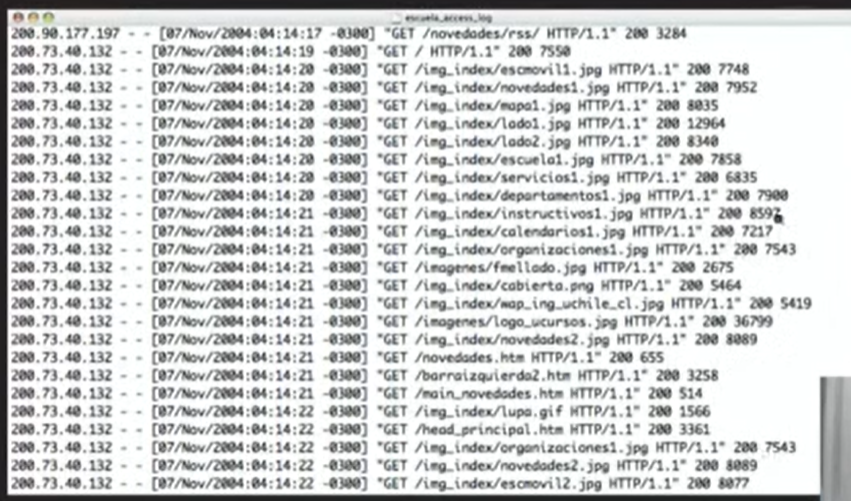

In [ ]:
colores = set() # Crear un conjunto vacío

colores.clear()  # Elimina todos los elementos

# Crear conjunto inicial
colores = {"rojo", "verde"}

# Añadir un color nuevo
colores.add("azul")

# Añadir un color que ya existe (no se duplica)
colores.add("rojo")

print(colores)

# Contar cuántos elementos tiene el conjunto
print("Cantidad de colores:", len(colores))

{'verde', 'azul', 'rojo'}
Cantidad de colores: 3


In [7]:
from tqdm import tqdm
import whisper

model = whisper.load_model("base")

# 1. Cargar el audio completo (sin recortarlo)
audio = whisper.load_audio("webcams.webm")

# 2. Convertirlo a espectrograma mel
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# 3. Opciones básicas
options = whisper.DecodingOptions(language="es")
segments = []

# 4. Procesar por bloques con barra de progreso
for i in tqdm(range(0, mel.shape[-1], 3000)):  # bloques ~30s
    segment = mel[:, i:i+3000]
    result = whisper.decode(model, segment, options)
    segments.append(result.text)

# 5. Guardar la transcripción completa
with open("transcripcion_clase.txt", "w", encoding="utf-8") as f:
    f.write(" ".join(segments))

print("✅ Transcripción completa exportada a 'transcripcion_clase.txt'")


KeyboardInterrupt: 

In [ ]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("webcams_audio.wav", language="es")

with open("transcripcion_clase.txt", "w", encoding="utf-8") as f:
    f.write(result["text"])